<a href="https://colab.research.google.com/github/srzn24/LGMVIP-DataScience/blob/main/exploratory_data_analysis_terrorism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA: Terrorism

### Importing Datasets

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import datasets
from matplotlib import pyplot
from pandas.plotting import scatter_matrix
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import os 
import mpl_toolkits
import json

### Reading Datasets

In [8]:
df_terrorism= pd.read_csv(r"/content/globalterrorismdb_0718dist.csv",encoding='ISO-8859-1')

In [9]:
df_terrorism.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


In [10]:
# Dimensions of the DataFrame
df_terrorism.shape

(11960, 135)

### Cleaning

In [11]:
# Selecting Wanted columns
usecols = [1, 5, 8, 10, 11, 12, 13, 14, 25, 26, 27, 29, 35, 58, 69, 71, 82, 98, 100, 101, 103, 104, 106]
renamecols = {
    'latitude': 'lat',
    'longitude': 'lon',
    'iyear': u'year',
    'country_txt': u'country',
    'region_txt': u'region',
    'provstate': u'state',
    'attacktype1_txt': u'attacktype',
    'targtype1_txt': u'targettype',
    'weaptype1_txt': u'weapontype',
    'nperps': u'nter',
    'nkill': u'nkilled',
    'nkillter': u'nkilledter',
    'nwound': u'nwounded',
    'nwoundte': u'nwoundedter',
    'propextent_txt': u'propertyextent'
}

In [12]:
df_terrorism= pd.read_csv(r"/content/globalterrorismdb_0718dist.csv",encoding='ISO-8859-1',usecols=usecols)
df_terrorism.rename(columns=renamecols, inplace=True)
df_terrorism = df_terrorism.apply(lambda x: x.encode('utf-8').strip() if isinstance(x, str) else x)

In [13]:
df_terrorism.shape

(11960, 23)

In [14]:
df_terrorism.head()

,year,extended,country,region,state,city,lat,lon,multiple,success,...,gname,nter,claimed,weapontype,nkilled,nkilledter,nwounded,nwoundedter,property,propertyextent
0,1970,0,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,0,1,...,MANO-D,NaN,NaN,Unknown,1.0,NaN,0.0,NaN,0.0,NaN
1,1970,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,0,1,...,23rd of September Communist League,7.0,NaN,Unknown,0.0,NaN,0.0,NaN,0.0,NaN
2,1970,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,0,1,...,Unknown,NaN,NaN,Unknown,1.0,NaN,0.0,NaN,0.0,NaN
3,1970,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,0,1,...,Unknown,NaN,NaN,Explosives,NaN,NaN,NaN,NaN,1.0,NaN
4,1970,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,0,1,...,Unknown,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,1.0,NaN


In [15]:
# Removing unknown values in the coordinates
df_terrorism = df_terrorism[pd.notnull(df_terrorism.lat)]
df_terrorism = df_terrorism[pd.notnull(df_terrorism.lon)]
print("Unknown values in the coordinates are removed succcessfully")

Unknown values in the coordinates are removed succcessfully


In [16]:
# Unknowns in numeric columns
exclude_cols = ['year', 'lat', 'lon']
float_cols = [c for c in df_terrorism.select_dtypes(include=[float]).columns.tolist() if c not in exclude_cols]

In [17]:
df_terrorism[float_cols] = df_terrorism[float_cols].fillna(0).astype(int)
df_terrorism[float_cols] = df_terrorism[float_cols].mask(df_terrorism[float_cols] < 0, 0)

In [18]:
# Unknowns in string columns
str_cols = df_terrorism.select_dtypes(exclude=[float]).columns.tolist()
df_terrorism[str_cols] = df_terrorism[str_cols].fillna('Unknown')

In [19]:
# Many fields are dots which mean unknown value
df_terrorism[str_cols] = df_terrorism[str_cols].replace(r'^\.*$', 'Unknown', regex=True)

In [20]:
# Limit Long strings
df_terrorism['weapontype'] = df_terrorism['weapontype'].replace(u'Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)', 'Vehicle')
df_terrorism['propertyextent'] = df_terrorism['propertyextent'].replace(u'Minor (likely < $1 million)', u'Minor (< $1 million)')
df_terrorism['propertyextent'] = df_terrorism['propertyextent'].replace(u'Major (likely > $1 million but < $1 billion)', u'Major (< $1 billion)')
df_terrorism['propertyextent'] = df_terrorism['propertyextent'].replace(u'Catastrophic (likely > $1 billion)', u'Catastrophic (> $1 billion)')


In [21]:
# Number of duplicates values
df_terrorism.duplicated().sum()

2032

In [22]:
# Removal of duplicates values
df_terrorism.drop_duplicates(keep=False,inplace=True)
# No more null values
df_terrorism.isnull().sum()

year              0
extended          0
country           0
region            0
state             0
city              0
lat               0
lon               0
multiple          0
success           0
suicide           0
attacktype        0
targettype        0
gname             0
nter              0
claimed           0
weapontype        0
nkilled           0
nkilledter        0
nwounded          0
nwoundedter       0
property          0
propertyextent    0
dtype: int64

In [23]:
# Shape of Processed dataset
df_terrorism

,year,extended,country,region,state,city,lat,lon,multiple,success,...,gname,nter,claimed,weapontype,nkilled,nkilledter,nwounded,nwoundedter,property,propertyextent
0,1970,0,Dominican Republic,Central America & Caribbean,Unknown,Santo Domingo,18.456792,-69.951164,0,1,...,MANO-D,0,0,Unknown,1,0,0,0,0,Unknown
1,1970,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,0,1,...,23rd of September Communist League,7,0,Unknown,0,0,0,0,0,Unknown
2,1970,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,0,1,...,Unknown,0,0,Unknown,1,0,0,0,0,Unknown
3,1970,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,0,1,...,Unknown,0,0,Explosives,0,0,0,0,1,Unknown
4,1970,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,0,1,...,Unknown,0,0,Incendiary,0,0,0,0,1,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11953,1980,0,United Kingdom,Western Europe,Northern Ireland,Belfast,54.607712,-5.956210,0,1,...,Irish Republican Army (IRA),2,0,Firearms,1,0,0,0,0,Unknown
11954,1980,0,Turkey,Middle East & North Africa,Istanbul,Istanbul,41.106178,28.689863,0,1,...,Unknown,0,0,Firearms,2,0,0,0,0,Unknown
11955,1980,0,Colombia,South America,Magdalena,Lejania,9.513757,-74.229363,0,1,...,Revolutionary Armed Forces of Colombia (FARC),30,0,Firearms,0,0,0,0,1,Unknown
11957,1980,0,El Salvador,Central America & Caribbean,Cuscatlan,Candelaria,14.116667,-88.950000,0,1,...,Unknown,0,0,Unknown,0,0,0,0,1,Unknown


### EDA

In [24]:
# Columns in the Dataset
df_terrorism.columns

Index(['year', 'extended', 'country', 'region', 'state', 'city', 'lat', 'lon',
       'multiple', 'success', 'suicide', 'attacktype', 'targettype', 'gname',
       'nter', 'claimed', 'weapontype', 'nkilled', 'nkilledter', 'nwounded',
       'nwoundedter', 'property', 'propertyextent'],
      dtype='object')

In [25]:
# Datatypes in the Dataframe
df_terrorism.dtypes

year                int64
extended            int64
country            object
region             object
state              object
city               object
lat               float64
lon               float64
multiple            int64
success             int64
suicide             int64
attacktype         object
targettype         object
gname              object
nter                int64
claimed             int64
weapontype         object
nkilled             int64
nkilledter          int64
nwounded            int64
nwoundedter         int64
property            int64
propertyextent     object
dtype: object

In [26]:
# Summary of Dataset
df_terrorism.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8662 entries, 0 to 11959
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            8662 non-null   int64  
 1   extended        8662 non-null   int64  
 2   country         8662 non-null   object 
 3   region          8662 non-null   object 
 4   state           8662 non-null   object 
 5   city            8662 non-null   object 
 6   lat             8662 non-null   float64
 7   lon             8662 non-null   float64
 8   multiple        8662 non-null   int64  
 9   success         8662 non-null   int64  
 10  suicide         8662 non-null   int64  
 11  attacktype      8662 non-null   object 
 12  targettype      8662 non-null   object 
 13  gname           8662 non-null   object 
 14  nter            8662 non-null   int64  
 15  claimed         8662 non-null   int64  
 16  weapontype      8662 non-null   object 
 17  nkilled         8662 non-null   

In [27]:
# Count of Values in each column of DataFrame
df_terrorism.nunique()

year                11
extended             2
country            112
region              11
state              655
city              2065
lat               2218
lon               2222
multiple             2
success              2
suicide              1
attacktype           9
targettype          22
gname              707
nter                39
claimed              2
weapontype          11
nkilled             52
nkilledter          15
nwounded            72
nwoundedter          5
property             2
propertyextent       3
dtype: int64

In [28]:
# Years in the DataFrame
df_terrorism["year"].unique()

array([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980])

In [29]:
# Count of each year in the Data Frame
df_terrorism["year"].value_counts()

1979    1890
1980    1499
1978    1190
1977     935
1976     671
1975     545
1970     514
1974     414
1971     361
1973     346
1972     297
Name: year, dtype: int64

In [30]:
# Total Count of the regions in the DataFrame
df_terrorism['region'].value_counts()

Western Europe                 3596
North America                  1254
Central America & Caribbean    1186
Middle East & North Africa     1121
South America                   935
Sub-Saharan Africa              214
Southeast Asia                  195
East Asia                        72
South Asia                       56
Eastern Europe                   21
Australasia & Oceania            12
Name: region, dtype: int64

In [31]:
# Total count of gname in the DataFrame
df_terrorism['gname'].value_counts()

Unknown                                        2600
Irish Republican Army (IRA)                     679
Basque Fatherland and Freedom (ETA)             462
Palestinians                                    190
Sandinista National Liberation Front (FSLN)     144
                                               ... 
Committee of action against bull fights           1
PORE                                              1
Popular Revolutionary Movement (Colombia)         1
Worker Autonomy, Continuous Struggle              1
Bloque Anti-Guerrillero de Oriente (BAGO)         1
Name: gname, Length: 707, dtype: int64

In [32]:
# Total count of cities in the DataFrame
df_terrorism['city'].value_counts()

Belfast          324
San Salvador     256
Rome             239
New York City    202
Paris            173
                ... 
Ardenza            1
Arica              1
Fregene            1
Caltrano           1
Lejania            1
Name: city, Length: 2065, dtype: int64

In [33]:
# Total count of Attack type in the DataFrame
df_terrorism['attacktype'].value_counts()

Bombing/Explosion                      3510
Assassination                          1745
Armed Assault                          1511
Facility/Infrastructure Attack          853
Hostage Taking (Kidnapping)             526
Unknown                                 258
Hostage Taking (Barricade Incident)     165
Hijacking                                68
Unarmed Assault                          26
Name: attacktype, dtype: int64

In [34]:
# Total count of Target type in the DataFrame
df_terrorism['targettype'].value_counts()

Business                          1790
Private Citizens & Property       1260
Government (General)              1164
Police                            1026
Military                           939
Government (Diplomatic)            626
Journalists & Media                302
Airports & Aircraft                296
Educational Institution            290
Transportation                     251
Utilities                          141
Religious Figures/Institutions     120
Terrorists/Non-State Militia       119
Unknown                             85
Violent Political Party             62
Telecommunication                   61
Tourists                            37
NGO                                 37
Maritime                            21
Food or Water Supply                15
Abortion Related                    12
Other                                8
Name: targettype, dtype: int64

In [35]:
# Stastical Summary of Data
df_terrorism.describe()

,year,extended,lat,lon,multiple,success,suicide,nter,claimed,nkilled,nkilledter,nwounded,nwoundedter,property
count,8662.000000,8662.000000,8662.000000,8662.000000,8662.000000,8662.000000,8662.0,8662.000000,8662.000000,8662.00000,8662.000000,8662.000000,8662.000000,8662.000000
mean,1976.749596,0.026668,30.257136,-22.266166,0.016047,0.890095,0.0,1.967329,0.012699,1.05172,0.048026,1.201916,0.005426,0.635073
std,3.028134,0.161121,22.227175,56.180065,0.125664,0.312790,0.0,15.971679,0.111979,6.81047,1.020063,7.840945,0.107852,0.481438
min,1970.000000,0.000000,-45.867889,-157.818968,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,1975.000000,0.000000,14.117287,-75.564766,0.000000,1.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,1978.000000,0.000000,38.524885,-5.956210,0.000000,1.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000
75%,1979.000000,0.000000,44.407062,12.490069,0.000000,1.000000,0.0,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,1.000000
max,1980.000000,1.000000,64.837778,172.636225,1.000000,1.000000,0.0,1000.000000,1.000000,422.00000,85.000000,285.000000,4.000000,1.000000


In [36]:
# Data in each column
for col in df_terrorism:
    print(df_terrorism[col].unique())


[1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980]
[0 1]
['Dominican Republic' 'Mexico' 'Philippines' 'Greece' 'Japan' 'Uruguay'
 'United States' 'Italy' 'East Germany (GDR)' 'Guatemala' 'Venezuela'
 'West Germany (FRG)' 'Switzerland' 'Jordan' 'Brazil' 'Egypt' 'Argentina'
 'Lebanon' 'Ireland' 'Turkey' 'Paraguay' 'Iran' 'United Kingdom'
 'Colombia' 'Nicaragua' 'Spain' 'Netherlands' 'Belgium' 'Canada'
 'Australia' 'Pakistan' 'Ethiopia' 'Sweden' 'Costa Rica' 'Bolivia'
 'South Yemen' 'Cambodia' 'Israel' 'Poland' 'Taiwan' 'Panama'
 'West Bank and Gaza Strip' 'Austria' 'India' 'France' 'South Vietnam'
 "People's Republic of the Congo" 'Portugal' 'Algeria' 'El Salvador'
 'Thailand' 'Haiti' 'Sudan' 'Morocco' 'Cyprus' 'Afghanistan' 'Chile'
 'Honduras' 'Yugoslavia' 'Ecuador' 'New Zealand' 'Zambia' 'Zaire'
 'Malaysia' 'Singapore' 'Botswana' 'Kuwait' 'Jamaica' 'Chad' 'North Yemen'
 'Syria' 'South Korea' 'Peru' 'United Arab Emirates' 'South Africa'
 'Kenya' 'Iraq' 'Somalia' 'Sri Lanka' 'Namib

In [37]:
# Covariance between set of variables
df_terrorism.cov()

,year,extended,lat,lon,multiple,success,suicide,nter,claimed,nkilled,nkilledter,nwounded,nwoundedter,property
year,9.169596,-0.025419,-10.973887,25.410884,-0.063179,0.019007,0.0,2.966532,-0.041156,1.027269,-0.006446,0.771269,0.001821,-0.054558
extended,-0.025419,0.025960,-0.369743,-0.182396,0.000149,0.002816,0.0,0.066337,0.000239,-0.011886,0.000336,-0.019356,0.000202,-0.013013
lat,-10.973887,-0.369743,494.047295,359.279706,0.081814,-0.301673,0.0,-26.365074,0.070391,-6.606560,-0.899911,-0.295652,-0.029821,0.007285
lon,25.410884,-0.182396,359.279706,3156.199667,-0.882080,-0.368936,0.0,-33.790178,-0.704617,5.971491,-0.518750,43.276902,-0.121595,0.667036
multiple,-0.063179,0.000149,0.081814,-0.882080,0.015791,-0.002162,0.0,-0.023491,0.004299,-0.012722,0.000037,0.008305,0.000606,-0.000032
success,0.019007,0.002816,-0.301673,-0.368936,-0.002162,0.097837,0.0,0.131613,-0.001029,0.090895,-0.002572,0.069187,-0.000096,0.046252
suicide,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
nter,2.966532,0.066337,-26.365074,-33.790178,-0.023491,0.131613,0.0,255.094533,-0.018982,6.403607,0.214362,2.246986,0.031813,0.284347
claimed,-0.041156,0.000239,0.070391,-0.704617,0.004299,-0.001029,0.0,-0.018982,0.012539,-0.008970,0.000198,-0.004643,0.000508,-0.000445
nkilled,1.027269,-0.011886,-6.606560,5.971491,-0.012722,0.090895,0.0,6.403607,-0.008970,46.382500,1.192759,8.893724,0.003530,0.038389


In [38]:
# Slicing Data
df_terrorism.iloc[0]

year                                     1970
extended                                    0
country                    Dominican Republic
region            Central America & Caribbean
state                                 Unknown
city                            Santo Domingo
lat                                 18.456792
lon                                -69.951164
multiple                                    0
success                                     1
suicide                                     0
attacktype                      Assassination
targettype        Private Citizens & Property
gname                                  MANO-D
nter                                        0
claimed                                     0
weapontype                            Unknown
nkilled                                     1
nkilledter                                  0
nwounded                                    0
nwoundedter                                 0
property                          

In [39]:
df_terrorism.iloc[:,0] 

0        1970
1        1970
2        1970
3        1970
4        1970
         ... 
11953    1980
11954    1980
11955    1980
11957    1980
11959    1980
Name: year, Length: 8662, dtype: int64

### Visualization

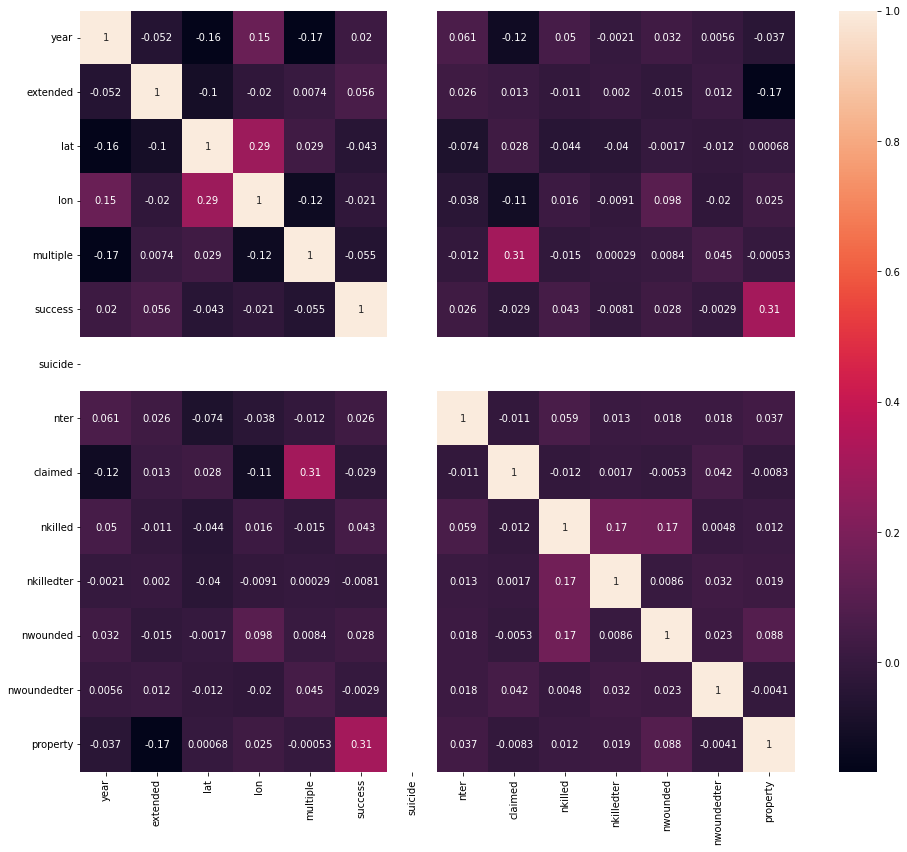

In [40]:
# Heat Map of the correlation among the columns
fig,axes = plt.subplots(1,1,figsize=(16,14))
sns.heatmap(df_terrorism.corr(), annot= True)
plt.show()

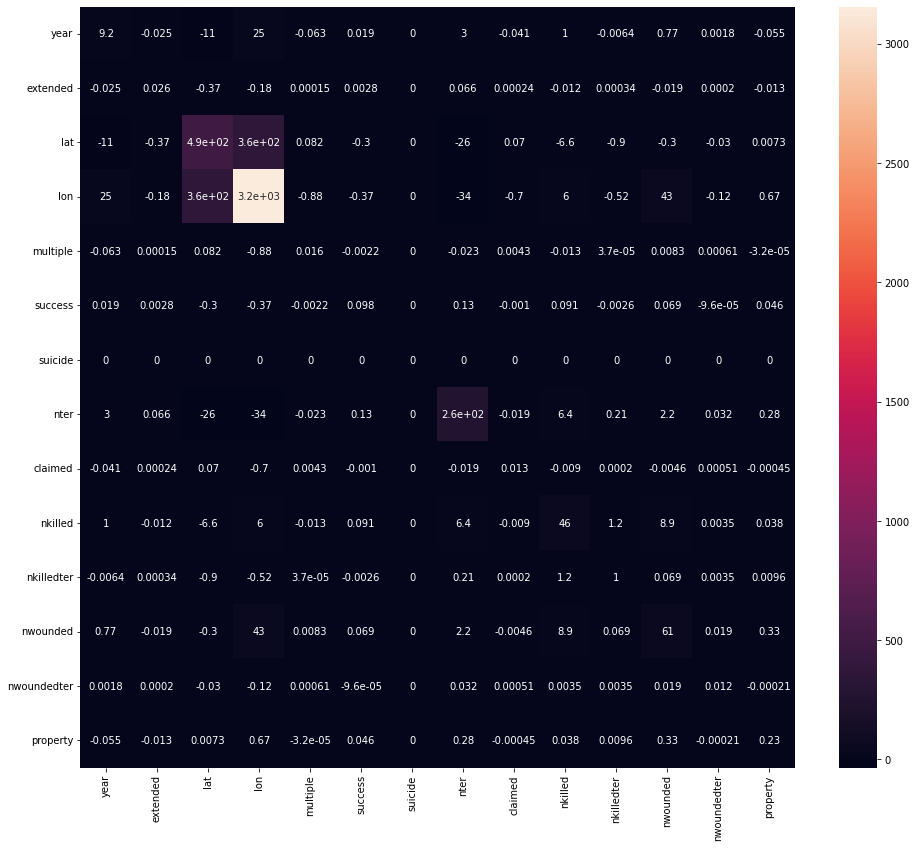

In [41]:
# Heat map of the covariance among the set of variables
fig,axes = plt.subplots(1,1,figsize=(16,14))
sns.heatmap(df_terrorism.cov(), annot= True)
plt.show()

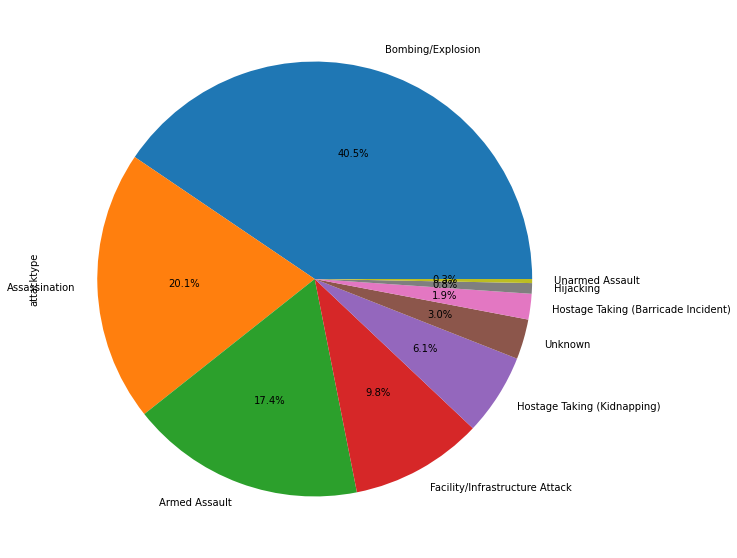

In [42]:
# Pie Plot of AttackTypes
plt.figure(figsize=(10,10))
df_terrorism['attacktype'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

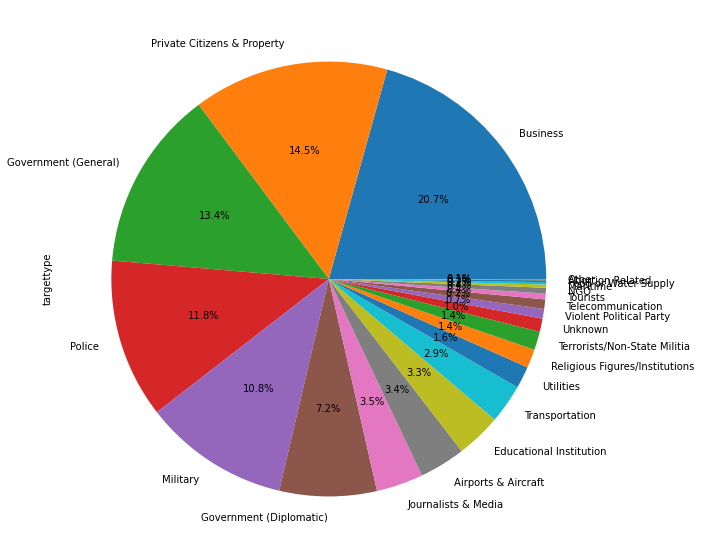

In [43]:
# Pie Plot of TargetTypes
plt.figure(figsize=(10,10))
df_terrorism['targettype'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

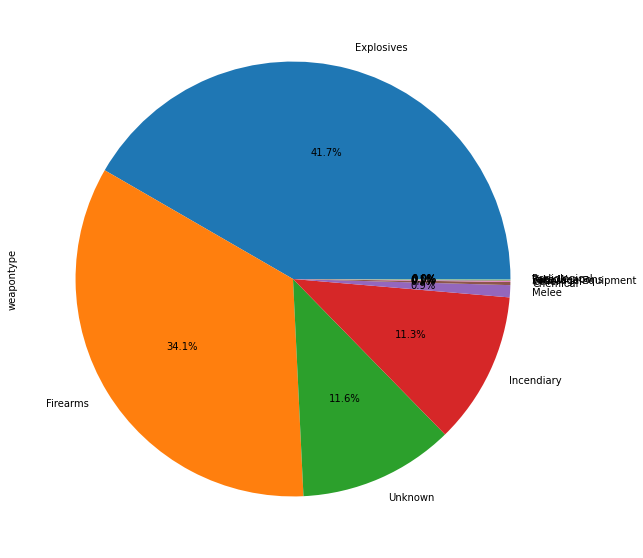

In [44]:
# Pie Plot of WeaponTypes
plt.figure(figsize=(10,10))
df_terrorism['weapontype'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

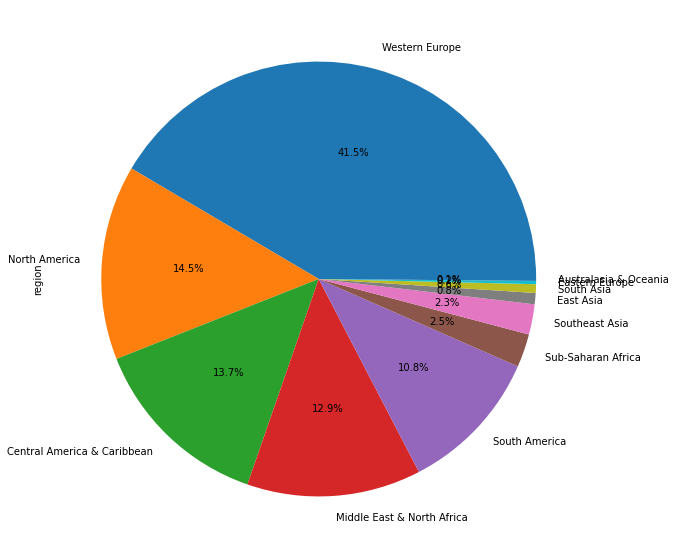

In [45]:
# Pie Plot of Region
plt.figure(figsize=(10,10))
df_terrorism['region'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

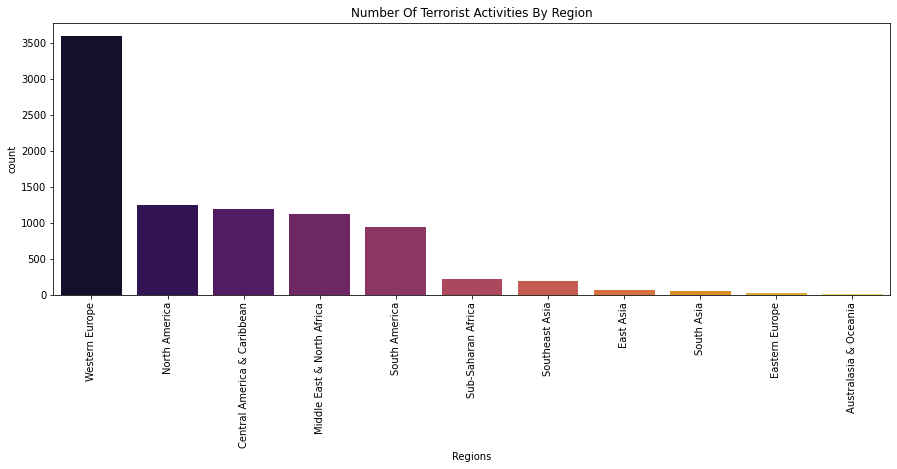

In [46]:
# Number of Terrorist Activities by Region
plt.subplots(figsize=(15,5))
sns.countplot('region',data=df_terrorism,palette='inferno',order=df_terrorism['region'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Regions')
plt.title('Number Of Terrorist Activities By Region')
plt.show()

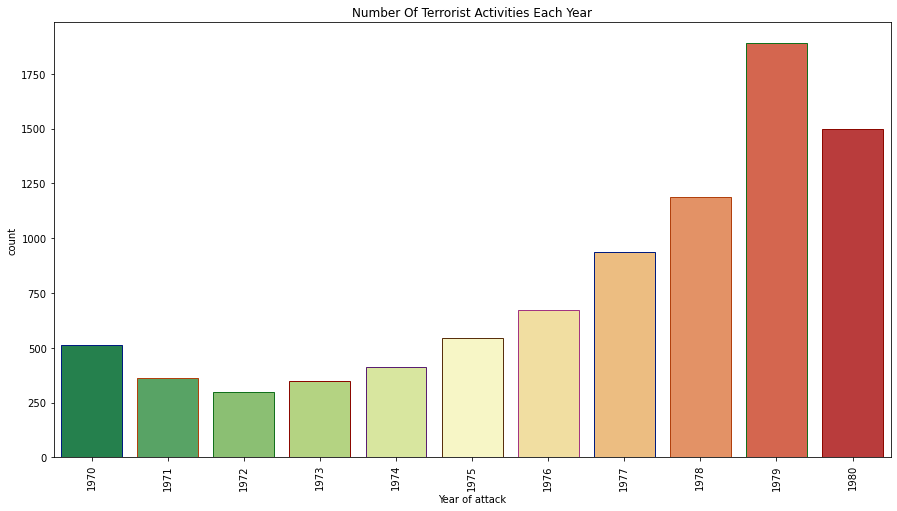

In [47]:
# Number of Terrorist Activities Each Year
plt.subplots(figsize=(15,8))
sns.countplot('year',data=df_terrorism,palette='RdYlGn_r',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.xlabel('Year of attack')
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

Text(0, 0.5, 'Frequency of Attacks')

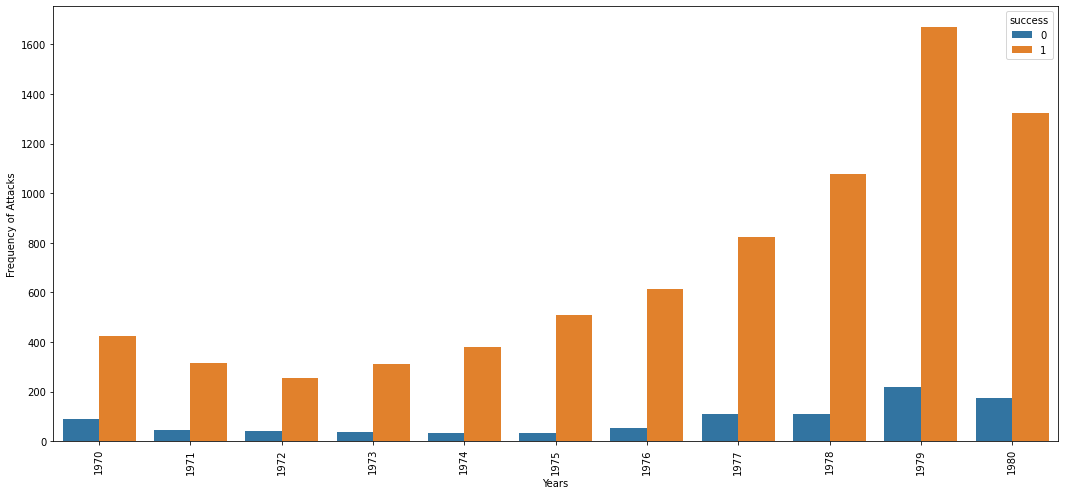

In [48]:
# Frequency of Attacks
plt.figure(figsize=(18,8))
sns.countplot(x=df_terrorism["year"], hue="success", data = df_terrorism)
plt.xlabel("Years")
plt.xticks(rotation=90)
plt.ylabel("Frequency of Attacks")

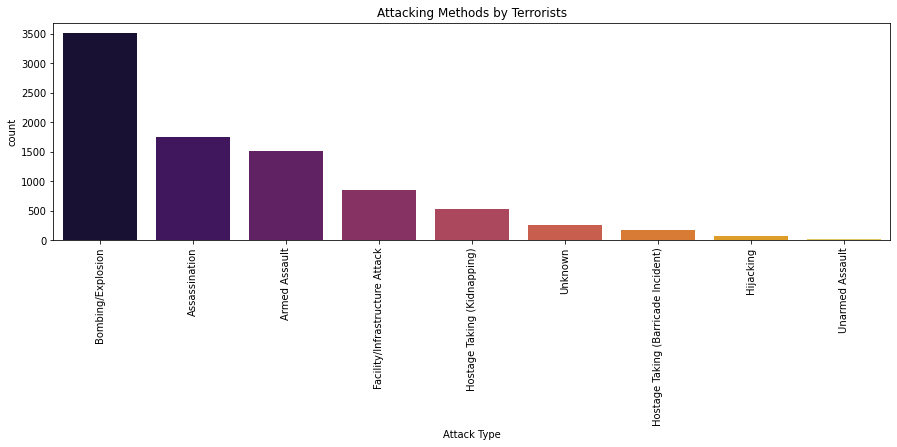

In [49]:
# Attacking Methods of Terrorists
plt.subplots(figsize=(15,4))
sns.countplot('attacktype',data=df_terrorism,palette='inferno',order=df_terrorism['attacktype'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Attack Type')
plt.title('Attacking Methods by Terrorists')
plt.show()

Text(0.5, 1.0, 'Types of Weapons')

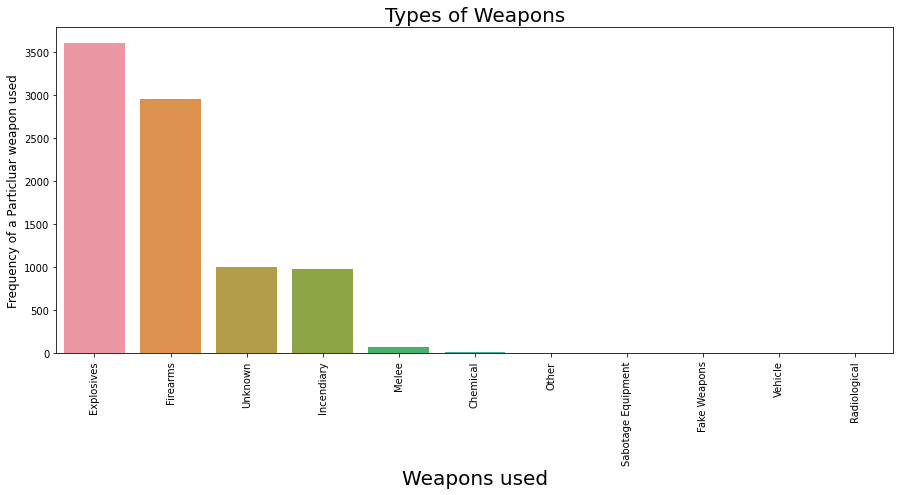

In [50]:
# Frequency of each weapon used
plt.figure(figsize=(15,6))
sns.barplot(x= df_terrorism["weapontype"].value_counts()[:50].index,y = df_terrorism["weapontype"].value_counts()[:50].values)
plt.xlabel("Weapons used", fontsize=20)
plt.xticks(rotation=90)
plt.ylabel("Frequency of a Particluar weapon used", fontsize=12)
plt.title("Types of Weapons", fontsize=20)

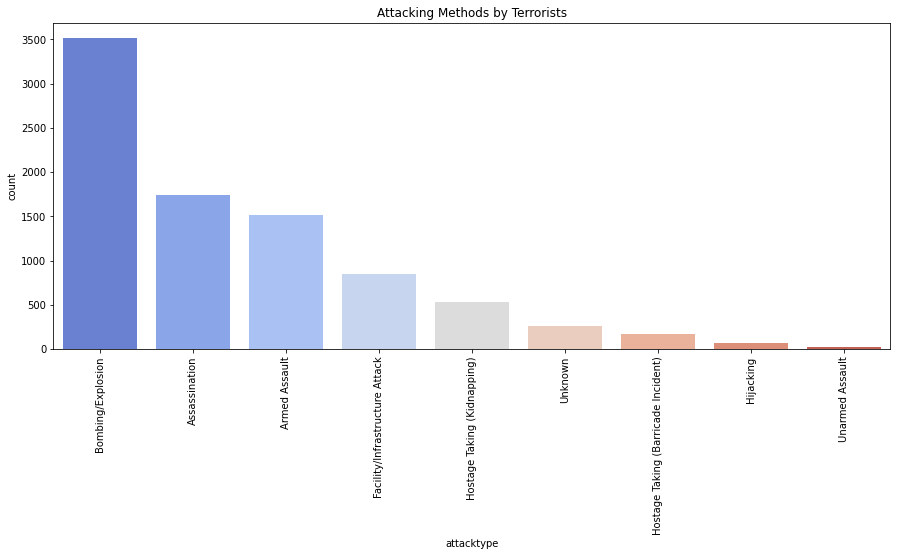

In [51]:
#Attacking Methods by the Terrorists
plt.subplots(figsize=(15,6))
sns.countplot(x= 'attacktype', data=df_terrorism, palette='coolwarm',order=df_terrorism['attacktype'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Attacking Methods by Terrorists')
plt.show()

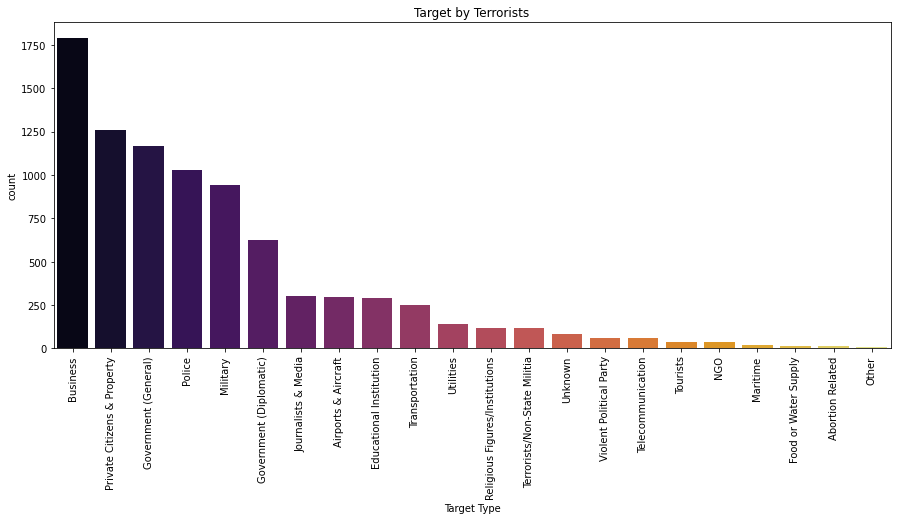

In [52]:
# Different Target places for Terrorists to Attack
plt.subplots(figsize=(15,6))
sns.countplot('targettype',data=df_terrorism,palette='inferno',order=df_terrorism['targettype'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Target Type')
plt.title('Target by Terrorists')
plt.show()

Text(0.5, 1.0, 'Number of Terrorist Activities Countrywise')

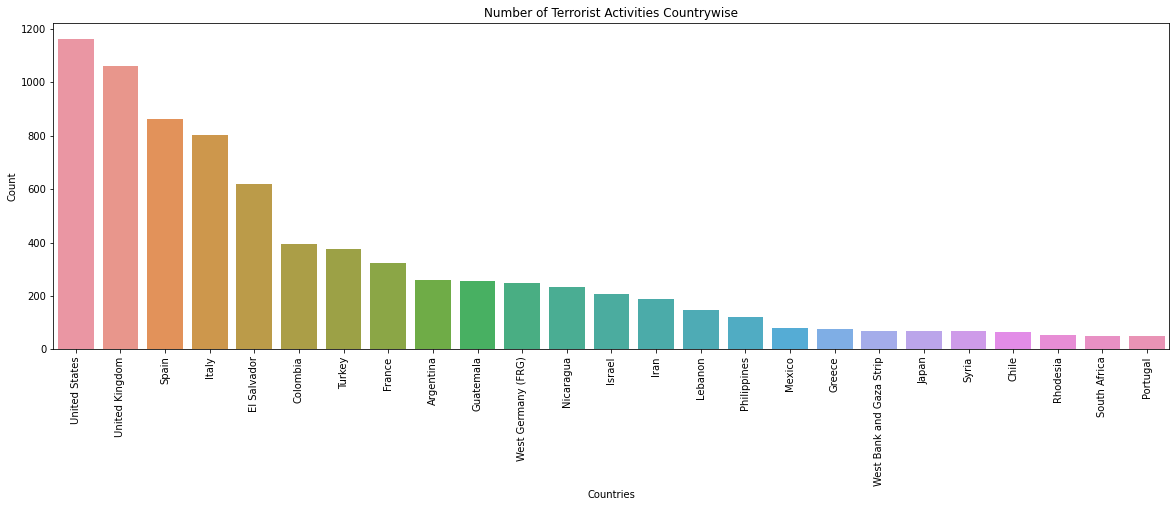

In [53]:
# Number of Terrorist Activities Countrywise
plt.figure(figsize=(20,6))
sns.barplot(x=df_terrorism['country'].value_counts()[:25].index, y=df_terrorism['country'].value_counts()[:25])
plt.xlabel("Countries")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.rcParams['figure.figsize'] = [10,8]
plt.title("Number of Terrorist Activities Countrywise")


Text(0.5, 1.0, 'Number of Terrorist Activities Regionwise')

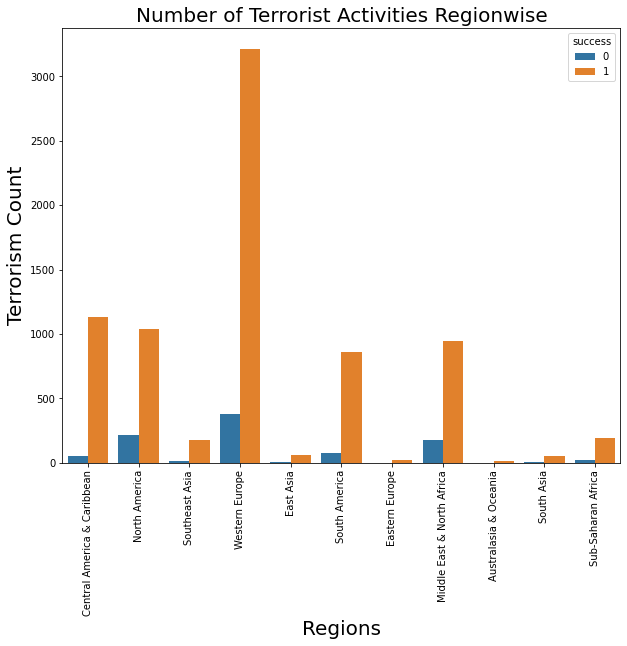

In [54]:
# Number of Terrorist Activities Regionwise
sns.countplot(x= df_terrorism["region"], hue="success", data=df_terrorism)
plt.xlabel("Regions", fontsize=20)
plt.xticks(rotation=90)
plt.ylabel("Terrorism Count", fontsize=20)
plt.title("Number of Terrorist Activities Regionwise", fontsize=20)

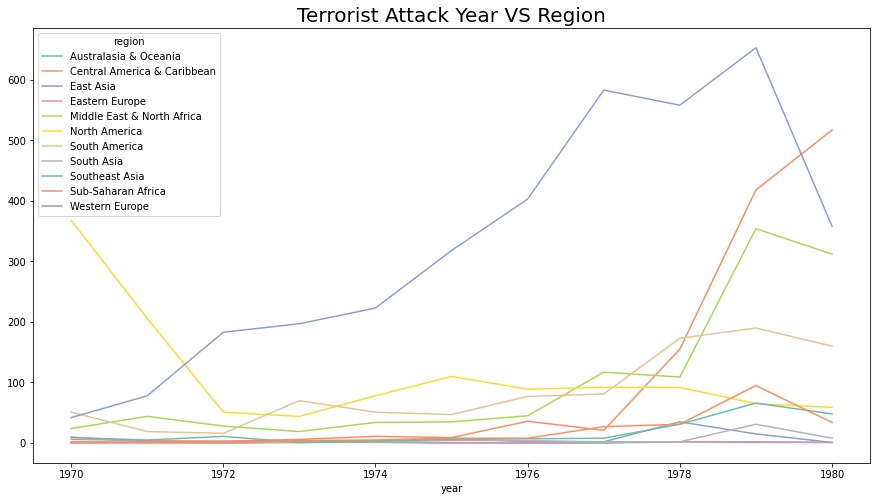

In [55]:
# Terrorist Attack Year VS Region
df_region=pd.crosstab(df_terrorism.year,df_terrorism.region)
df_region.plot(color=sns.color_palette('Set2',12))
fig=plt.gcf()
plt.title("Terrorist Attack Year VS Region", fontsize=20)
fig.set_size_inches(15,8)
plt.show()

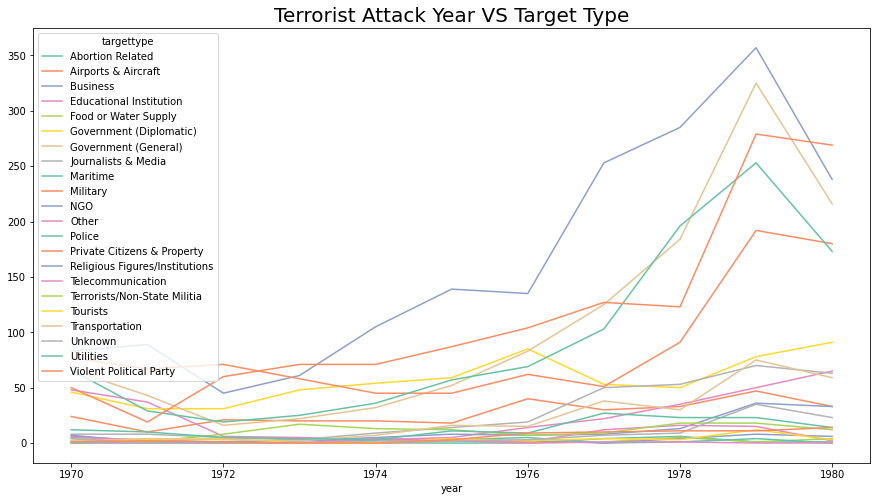

In [56]:
# Terrorist Attack Year VS Target Type
df_region=pd.crosstab(df_terrorism.year,df_terrorism.targettype)
df_region.plot(color=sns.color_palette('Set2',12))
fig=plt.gcf()
plt.title("Terrorist Attack Year VS Target Type", fontsize=20)
fig.set_size_inches(15,8)
plt.show()

Text(0, 0.5, 'Wounded')

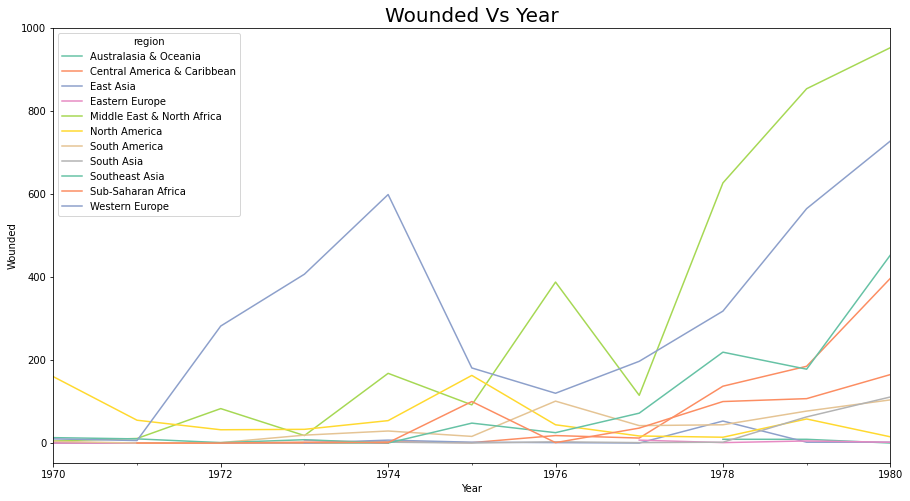

In [57]:
# Wounded VS Year
d=df_terrorism.groupby(['year','region'])['nwounded'].sum()
plot_df_terrorism = d.unstack('region').loc[:]
plot_df_terrorism.index = pd.PeriodIndex(plot_df_terrorism.index.tolist(),freq='A')
plot_df_terrorism.plot(figsize=(15,8),color=sns.color_palette('Set2',12))
plt.title("Wounded Vs Year", fontsize=20)
plt.xlabel("Year")
plt.ylabel("Wounded")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fabdb235b90>,
      dtype=object)

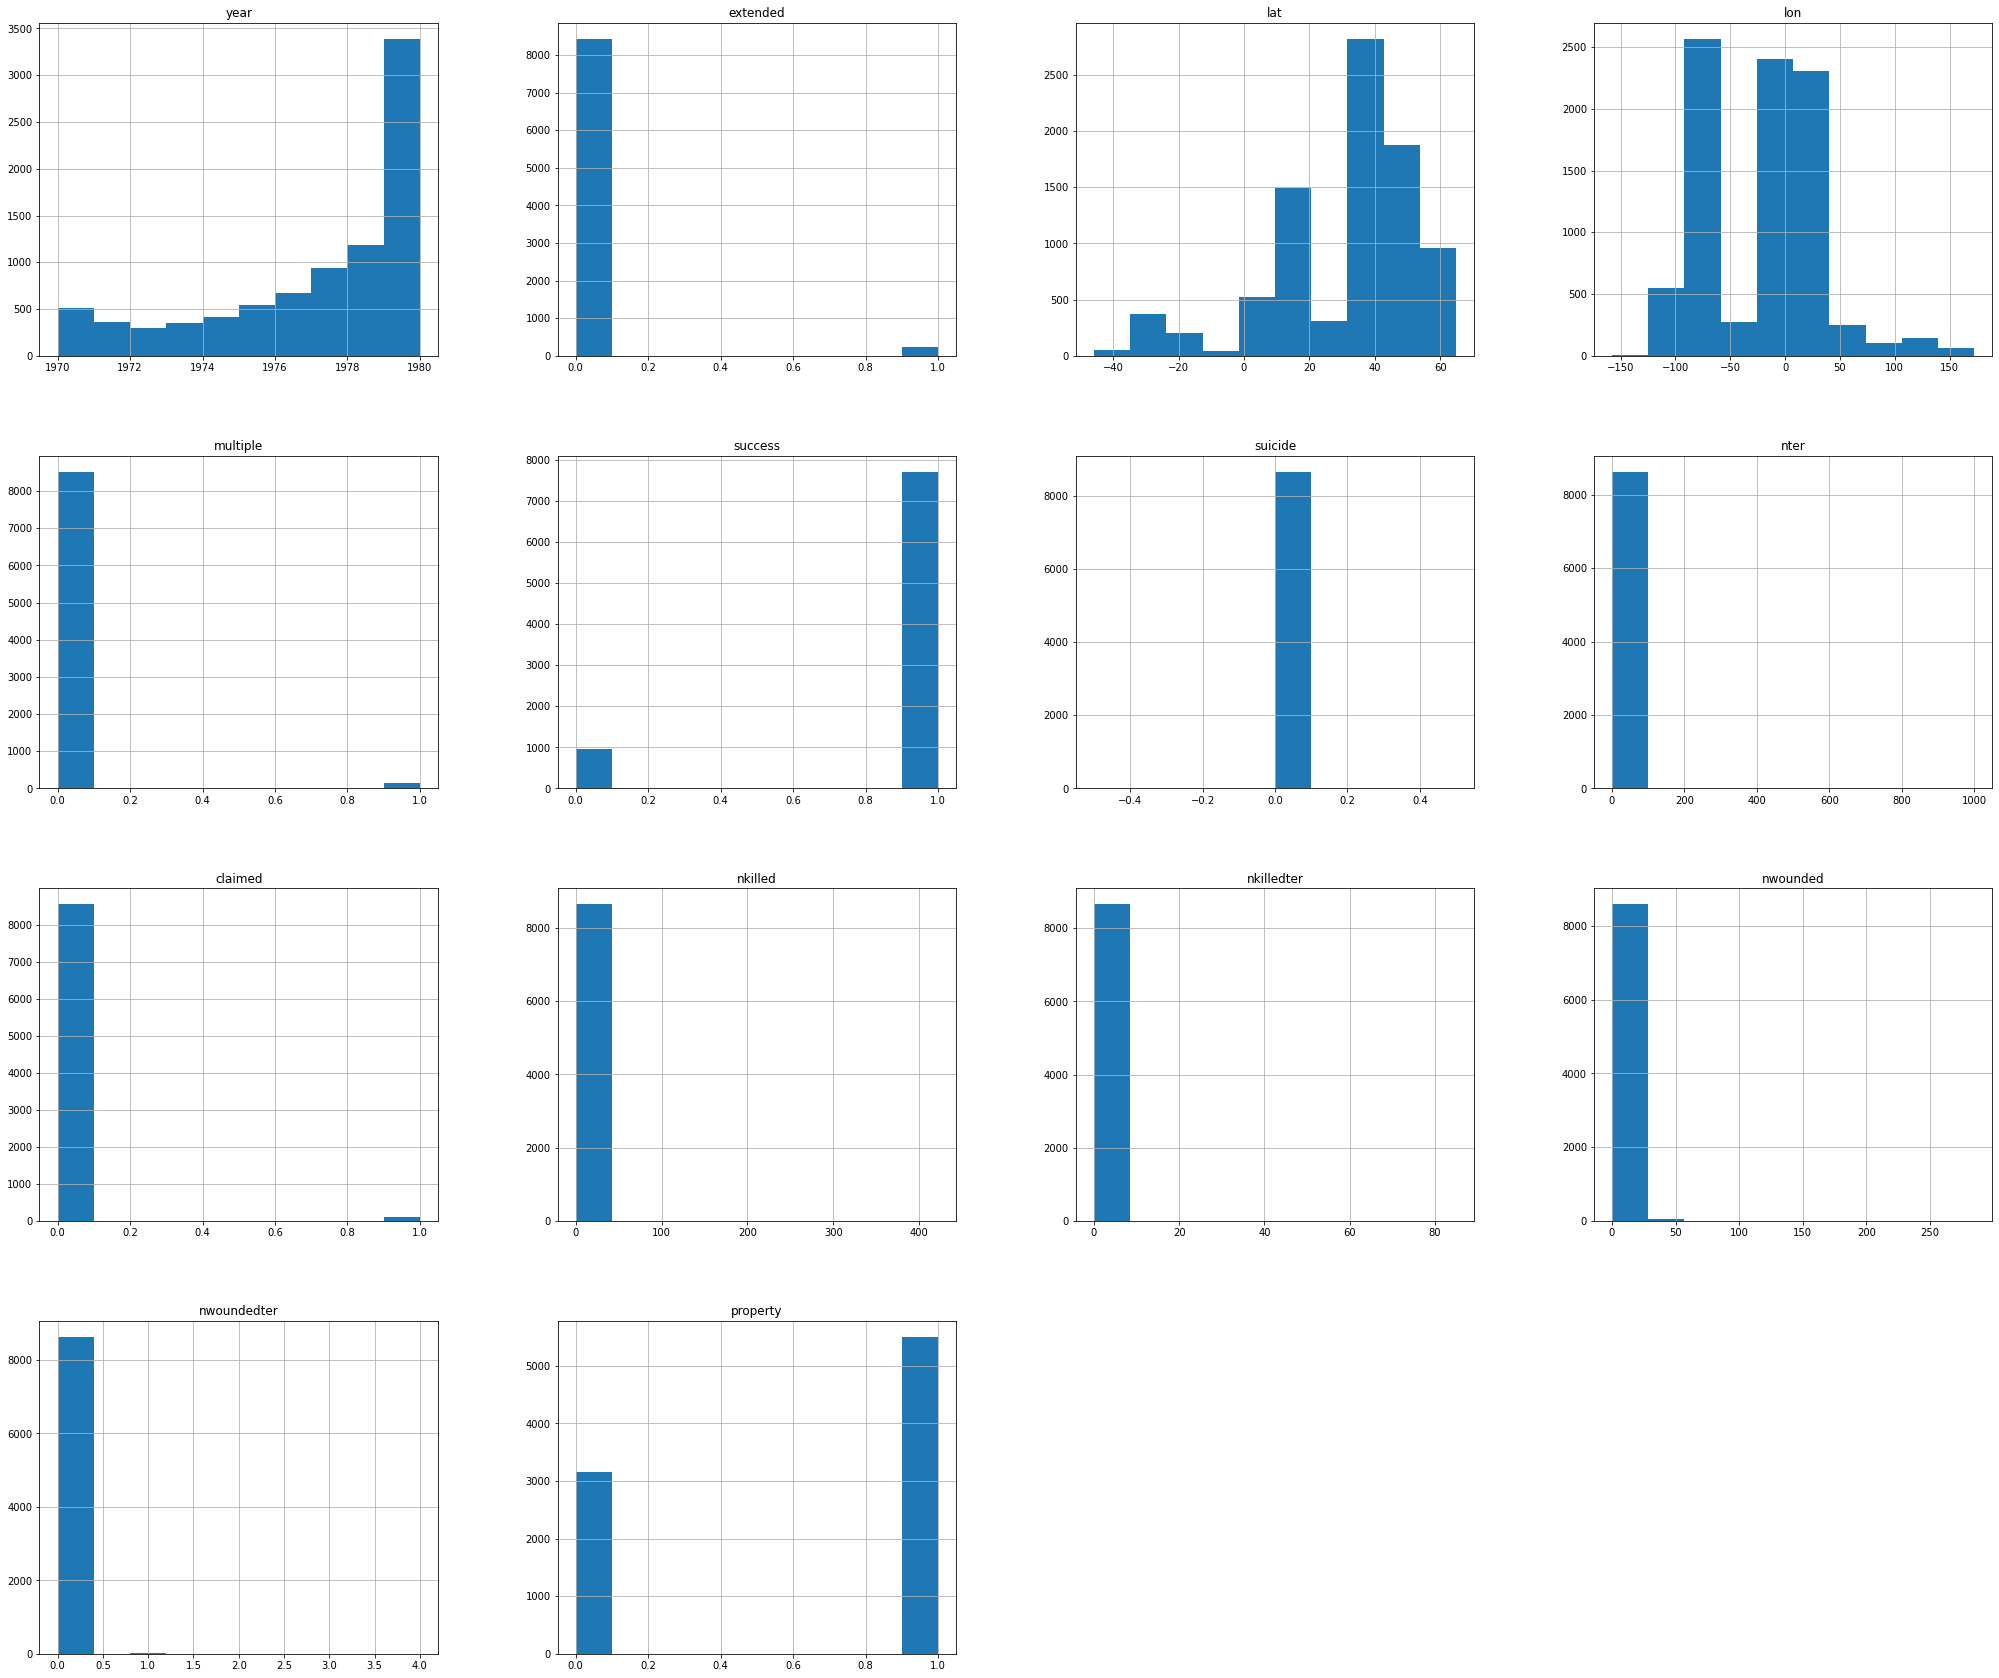

In [58]:
# Histogram of the Data
df_terrorism.hist(figsize=(35,30))

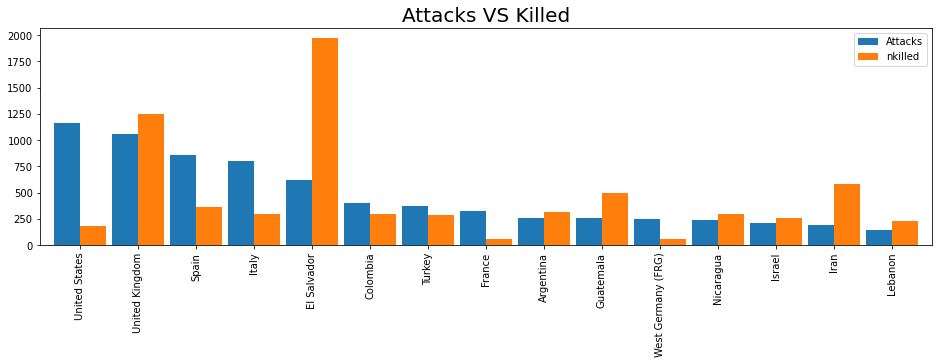

In [59]:
# Attacks VS Killed
count_terror = df_terrorism['country'].value_counts()[:15].to_frame()
count_terror.columns=['Attacks']
count_kill=df_terrorism.groupby ('country')['nkilled'].sum().to_frame()
count_terror.merge(count_kill,left_index = True,right_index =True,how='left').plot.bar(width=0.9)
fig=plt.gcf()
plt.title("Attacks VS Killed", fontsize=20)
fig.set_size_inches(16,4)
plt.show()

In [60]:
import folium
from folium.plugins import MarkerCluster 
filterYear = df_terrorism['year'] == 1970

In [61]:
filterData = df_terrorism[filterYear] # filter data
# filterData.info()
reqFilterData = filterData.loc[:,'city':'lon'] #We are getting the required fields
reqFilterData = reqFilterData.dropna() # drop NaN values in latitude and longitude
reqFilterDataList = reqFilterData.values.tolist()
# reqFilterDataList

In [62]:
map = folium.Map(location = [0, 30], tiles='CartoDB positron', zoom_start=2)
# clustered marker
markerCluster = folium.plugins.MarkerCluster().add_to(map)
for point in range(0, len(reqFilterDataList)):
    folium.Marker(location=[reqFilterDataList[point][1],reqFilterDataList[point][2]],
                  popup = reqFilterDataList[point][0]).add_to(markerCluster)
map

84% of the terrorist attacks in 1970 were carried out on the American continent. In 1970, the Middle East and North Africa, currently the center of wars and terrorist attacks, faced only one terrorist attack.

In [63]:
terror_df_group = df_terrorism.dropna(subset=['lat','lon'])
terror_df_group = terror_df_group.drop_duplicates(subset=['country','gname'])
terrorist_groups = df_terrorism.gname.value_counts()[1:8].index.tolist()
terror_df_group = terror_df_group.loc[terror_df_group.gname.isin(terrorist_groups)]
print(terror_df_group.gname.unique())

['Left-Wing Militants' 'Palestinians' 'Irish Republican Army (IRA)'
 'Sandinista National Liberation Front (FSLN)'
 'Basque Fatherland and Freedom (ETA)' 'Red Brigades'
 "People's Liberation Forces (FPL)"]


In [64]:
map = folium.Map(location=[20, 0], tiles="CartoDB positron", zoom_start=2)
markerCluster = folium.plugins.MarkerCluster().add_to(map)
for i in range(0,len(terror_df_group)):
    folium.Marker([terror_df_group.iloc[i]['lat'],terror_df_group.iloc[i]['lon']], 
                  popup='gname:{}<br>country:{}'.format(terror_df_group.iloc[i]['gname'], 
                  terror_df_group.iloc[i]['country'])).add_to(map)
map

### Conclusion

* Country with the highest number of Terrorist Attacks: Iraq
* Regions with the highest number of Terrorist Attacks: Middle East & North Africa
* Maximum number of people were killed by a single terrorist attack are 1570 people that took place in Iraq
* Year with the most Attacks: 2014
* Month with the most Attacks: 5
* Group with the most Attacks: Taliban
* Most Attacks Types: Bombing/Explosion